## 1. La legge dei grandi numeri

La legge dei grandi numeri è un teorema fondamentale della teoria della probabilità che indica che se ripetiamo molte volte (tendendo all'infinito) lo stesso esperimento, la frequenza di un certo evento tende ad essere costante.

Vale a dire, **la legge dei grandi numeri indica che se lo stesso test viene eseguito ripetutamente (ad esempio, lancio di una moneta), la frequenza con cui si ripeterà un determinato evento (testa/croce) si avvicinerà a una costante. Questa a sua volta sarà la probabilità che questo evento si verifichi.**

Fonte: https://it.economy-pedia.com/11038376-law-of-the-big-numbers

- Scrivere una funzione che simula il lancio di una moneta per N volte e restituisce la frequenza % di volte che è uscita testa.
- Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
- Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)





<Axes: title={'center': 'Frequenza di testa in funzione del numero di lanci'}, xlabel='Numero di lanci', ylabel='Frequenza di testa (%)'>

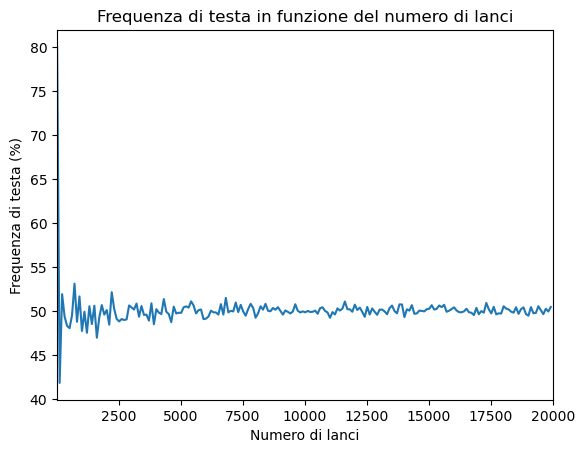

In [2]:
import random as r
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
def lanciomoneta(N):
    testa=0
    for i in range(N):
        if r.randint(0,1)==1:
            testa+=1
    return (testa/N)*100



freq = [lanciomoneta(n) for n in range(10, 20001,100)]
freq = pd.Series(freq, index=range(10, 20001,100))
plt.title("Frequenza di testa in funzione del numero di lanci")
plt.xlabel("Numero di lanci")
plt.ylabel("Frequenza di testa (%)")
plt.xlim(5,20000)
freq.plot()


## 2. Analisi del Dataset Titanic
- Quante righe e colonne ha il dataset?
- Controlla quanti valori mancanti ci sono per colonna
- Riempi i valori mancanti nella colonna 'Embarked' con il valore più frequente
- Rimuovi le righe dove il valore di 'Age' è mancante
- Controlla se ci sono righe duplicate
- Calcola l'età media dei passeggeri per ogni classe (`Pclass`), se ci sono valori mancanti di età riempili con il valore medio
- Visualizza la distribuzione dell'età per classe
- Visualizza la distribuzione dell'età per classe dividendo e mmostrando insieme i dati di uomini e donne

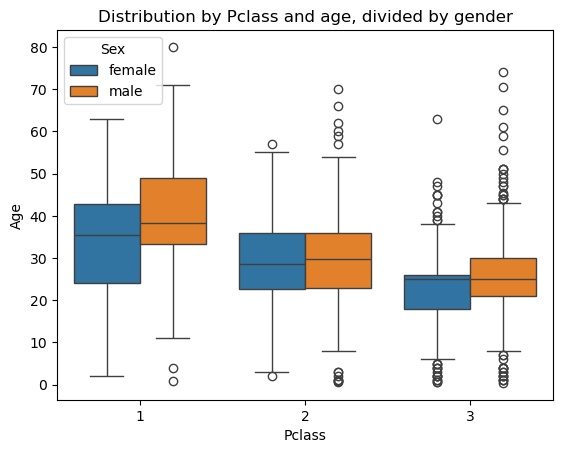

In [3]:

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()
numrighe = df.shape[0]
numcolonne = df.shape[1]
# Count missing values for each column
conta_manchi = df.isnull().sum()
valuemax=df['Embarked'].value_counts()
valuemax=valuemax.axes[0].tolist()[0]
valuemax
df['Embarked']= df['Embarked'].fillna(valuemax)
df['Age'] = df['Age'].dropna()
countdup = df.duplicated().sum()
media_age = df.groupby('Pclass')['Age'].mean()

df['Age'] = df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.mean()))
#plt.xticks([1,2,3])
sns.boxplot(data=df, x="Pclass",y="Age", hue="Sex")
plt.title("Distribution by Pclass and age, divided by gender")
plt.xlabel("Pclass")
plt.show()


## 3. Analisi del Dataset Iris

- Esplora la distribuzione delle specie (conta quanti campioni ci sono per specie)
- Calcola la lunghezza e la larghezza media dei petali per specie
- Visualizza le dimensioni dei petali per specie (scatterplot)
- Crea una nuova colonna per l'area del petalo e analizzala
- Grafico della distribuzione dell'area del petalo per specie (boxplot)

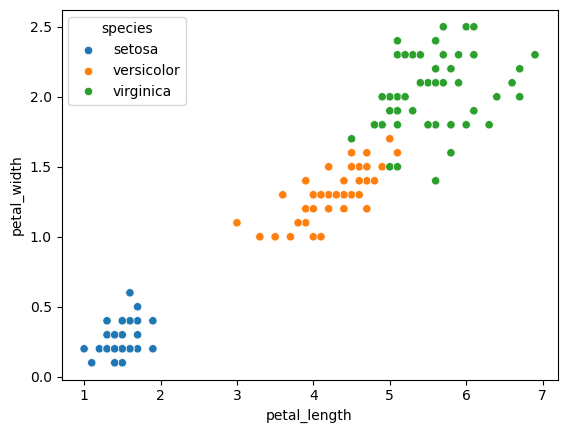

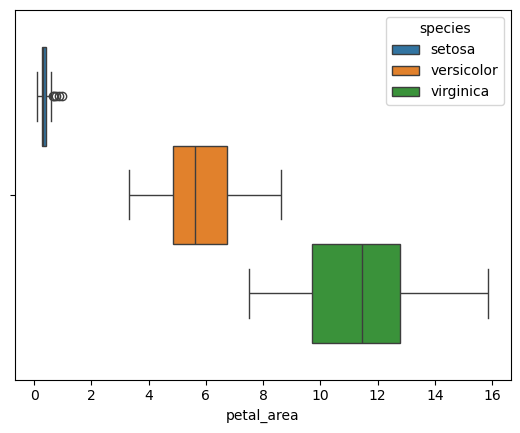

In [157]:

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)
df.head()
#df['species'].value_counts()
l_med=df.groupby('species')['petal_length'].mean()
w_med=df.groupby('species')['petal_width'].mean()
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')
plt.show()
df['petal_area']=(df['petal_length']*df['petal_width'])
sns.boxplot(data=df, x='petal_area', hue='species')
plt.show()